In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
import tensorflow as tf

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from tabulate import tabulate

# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'heart_2022_with_nans.csv'

# 2. Exploring the Dataset

<Axes: >

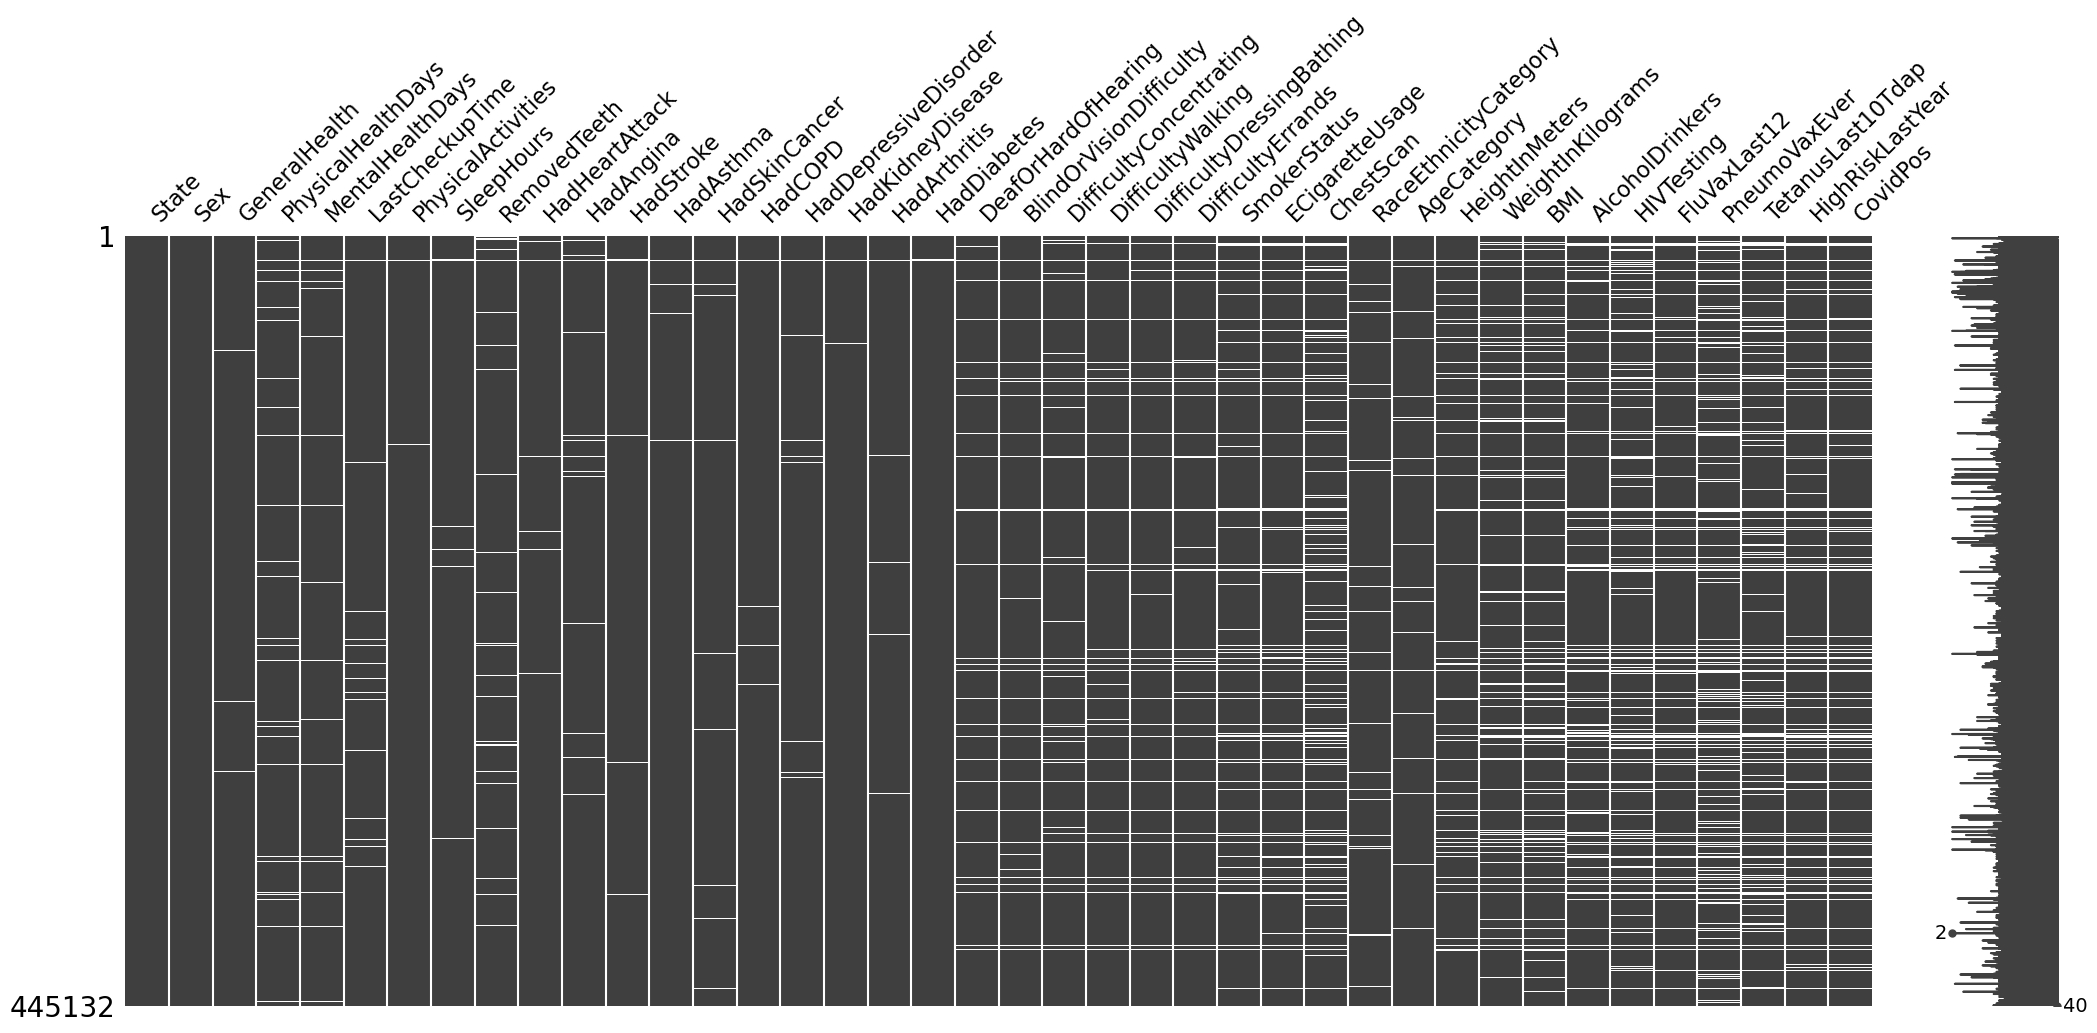

In [3]:
# Check he missing data
%matplotlib inline
msno.matrix(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [5]:
# Statistical Analysis for numerical data in dataset
print(f"Summary of the Dataset with Numerical Columns")
df.describe()

Summary of the Dataset with Numerical Columns


,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

In [7]:
# How many distinct values in each column
for column in df.columns:
    print(f"{column}: {len(df[column].unique())} distinct values")

State: 54 distinct values
Sex: 2 distinct values
GeneralHealth: 6 distinct values
PhysicalHealthDays: 32 distinct values
MentalHealthDays: 32 distinct values
LastCheckupTime: 5 distinct values
PhysicalActivities: 3 distinct values
SleepHours: 25 distinct values
RemovedTeeth: 5 distinct values
HadHeartAttack: 3 distinct values
HadAngina: 3 distinct values
HadStroke: 3 distinct values
HadAsthma: 3 distinct values
HadSkinCancer: 3 distinct values
HadCOPD: 3 distinct values
HadDepressiveDisorder: 3 distinct values
HadKidneyDisease: 3 distinct values
HadArthritis: 3 distinct values
HadDiabetes: 5 distinct values
DeafOrHardOfHearing: 3 distinct values
BlindOrVisionDifficulty: 3 distinct values
DifficultyConcentrating: 3 distinct values
DifficultyWalking: 3 distinct values
DifficultyDressingBathing: 3 distinct values
DifficultyErrands: 3 distinct values
SmokerStatus: 5 distinct values
ECigaretteUsage: 5 distinct values
ChestScan: 3 distinct values
RaceEthnicityCategory: 6 distinct values
AgeC

In [8]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,82370,18.51
PneumoVaxEver,76894,17.28
HIVTesting,65981,14.83
ChestScan,55900,12.56
CovidPos,50618,11.38
HighRiskLastYear,50477,11.34
BMI,48659,10.94
FluVaxLast12,46975,10.56
AlcoholDrinkers,46428,10.43
WeightInKilograms,41931,9.42


In [9]:
# Remove unneccessary columns using drop()
columns_to_drop = [
    'LastCheckupTime', 'RemovedTeeth', 'HadCOPD', 
    'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 
    'DifficultyDressingBathing', 'DifficultyErrands', 
    'HeightInMeters', 'WeightInKilograms', 
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]
df1 = df.drop(columns=columns_to_drop)
df1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers
0,Alabama,Female,Very good,0.0,0.0,No,8.0,No,No,No,...,No,Yes,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,No
1,Alabama,Female,Excellent,0.0,0.0,No,6.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,26.57,No
2,Alabama,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,25.61,No
3,Alabama,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,...,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,23.30,No
4,Alabama,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,21.77,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Yes,6.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,25.63,NaN
445128,Virgin Islands,Female,Excellent,2.0,2.0,Yes,7.0,No,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,28.66,No
445129,Virgin Islands,Female,Poor,30.0,30.0,No,5.0,No,No,No,...,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,17.23,NaN
445130,Virgin Islands,Male,Very good,0.0,0.0,No,5.0,Yes,No,No,...,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,32.55,No


In [10]:
# Check columns names after dropping
df1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadDiabetes', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage',
       'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'BMI',
       'AlcoholDrinkers'],
      dtype='object')

In [11]:
# Reorganize columns order
column_order = [
        # User Info
        'State', 'Sex', 'AgeCategory', 'RaceEthnicityCategory','BMI', 
        # General health
        'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities', 'ChestScan',
        # risks
        'SleepHours', 'DifficultyWalking', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 
        # Medication History
        'HadHeartAttack', 'HadAngina',  'HadStroke', 'HadAsthma',
        'HadSkinCancer', 'HadDepressiveDisorder', 'HadKidneyDisease','HadDiabetes', 
        ]
df1 = df1[column_order]
df1

,State,Sex,AgeCategory,RaceEthnicityCategory,BMI,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,ChestScan,...,ECigaretteUsage,AlcoholDrinkers,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadDepressiveDisorder,HadKidneyDisease,HadDiabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,0.0,No,No,...,Not at all (right now),No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,0.0,No,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,3.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,3.0,Yes,Yes,...,Never used e-cigarettes in my entire life,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,2.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,30.0,No,NaN,...,Use them some days,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,0.0,No,Yes,...,Never used e-cigarettes in my entire life,No,Yes,No,No,Yes,No,No,No,No


In [12]:
# Renaming columns using a dictionary
df1 = df1.rename(columns={
    'AgeCategory': "Age", 
    'RaceEthnicityCategory': "Race",
    'GeneralHealth': "GenHealth",
    'PhysicalHealthDays': "PhysicalHealth",
    'PhysicalActivities': "PhysicalActivity",
    'MentalHealthDays': "MentalHealth",
    'HadAngina': "Angina",
    'HadHeartAttack': "HeartAttack",
    'HadStroke': "Stroke",
    'HadAsthma': "Asthma",
    'HadSkinCancer': "SkinCancer",
    'HadDepressiveDisorder': "Depressed",
    'HadKidneyDisease': "KidneyDisease",
    'DifficultyWalking': "DiffWalking",
    'HadDiabetes': "Diabetes",
    'SmokerStatus': "Smoking",
    'AlcoholDrinkers': "Drinking"
})
df1

,State,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
0,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",NaN,Very good,0.0,0.0,No,No,...,Not at all (right now),No,No,No,No,No,No,No,No,Yes
1,Alabama,Female,Age 80 or older,"White only, Non-Hispanic",26.57,Excellent,0.0,0.0,No,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
2,Alabama,Female,Age 55 to 59,"White only, Non-Hispanic",25.61,Very good,2.0,3.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,Yes,No,No,No
3,Alabama,Female,NaN,"White only, Non-Hispanic",23.30,Excellent,0.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,No,No,No,No,Yes,No,No,No,No
4,Alabama,Female,Age 40 to 44,"White only, Non-Hispanic",21.77,Fair,2.0,0.0,Yes,Yes,...,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Age 18 to 24,"Black only, Non-Hispanic",25.63,Good,0.0,3.0,Yes,Yes,...,Never used e-cigarettes in my entire life,NaN,No,No,No,Yes,No,Yes,No,No
445128,Virgin Islands,Female,Age 50 to 54,"Black only, Non-Hispanic",28.66,Excellent,2.0,2.0,Yes,No,...,Never used e-cigarettes in my entire life,No,No,No,No,No,No,No,No,No
445129,Virgin Islands,Female,Age 65 to 69,NaN,17.23,Poor,30.0,30.0,No,NaN,...,Use them some days,NaN,No,No,No,No,No,No,No,No
445130,Virgin Islands,Male,Age 70 to 74,"Black only, Non-Hispanic",32.55,Very good,0.0,0.0,No,Yes,...,Never used e-cigarettes in my entire life,No,Yes,No,No,Yes,No,No,No,No


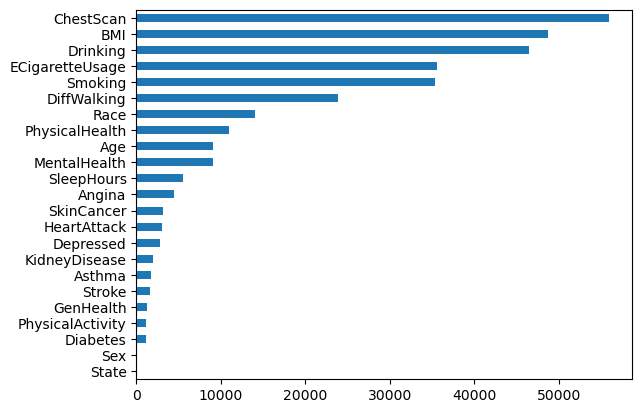

In [13]:
# Plot the distribution of NaN Values
df1.isna().sum().sort_values().plot(kind="barh")
plt.show()

In [14]:
# Remove the missing values
df1 = df1.dropna()

# Check again the missing values
df1.isna().sum()

State               0
Sex                 0
Age                 0
Race                0
BMI                 0
GenHealth           0
PhysicalHealth      0
MentalHealth        0
PhysicalActivity    0
ChestScan           0
SleepHours          0
DiffWalking         0
Smoking             0
ECigaretteUsage     0
Drinking            0
HeartAttack         0
Angina              0
Stroke              0
Asthma              0
SkinCancer          0
Depressed           0
KidneyDisease       0
Diabetes            0
dtype: int64

<Axes: >

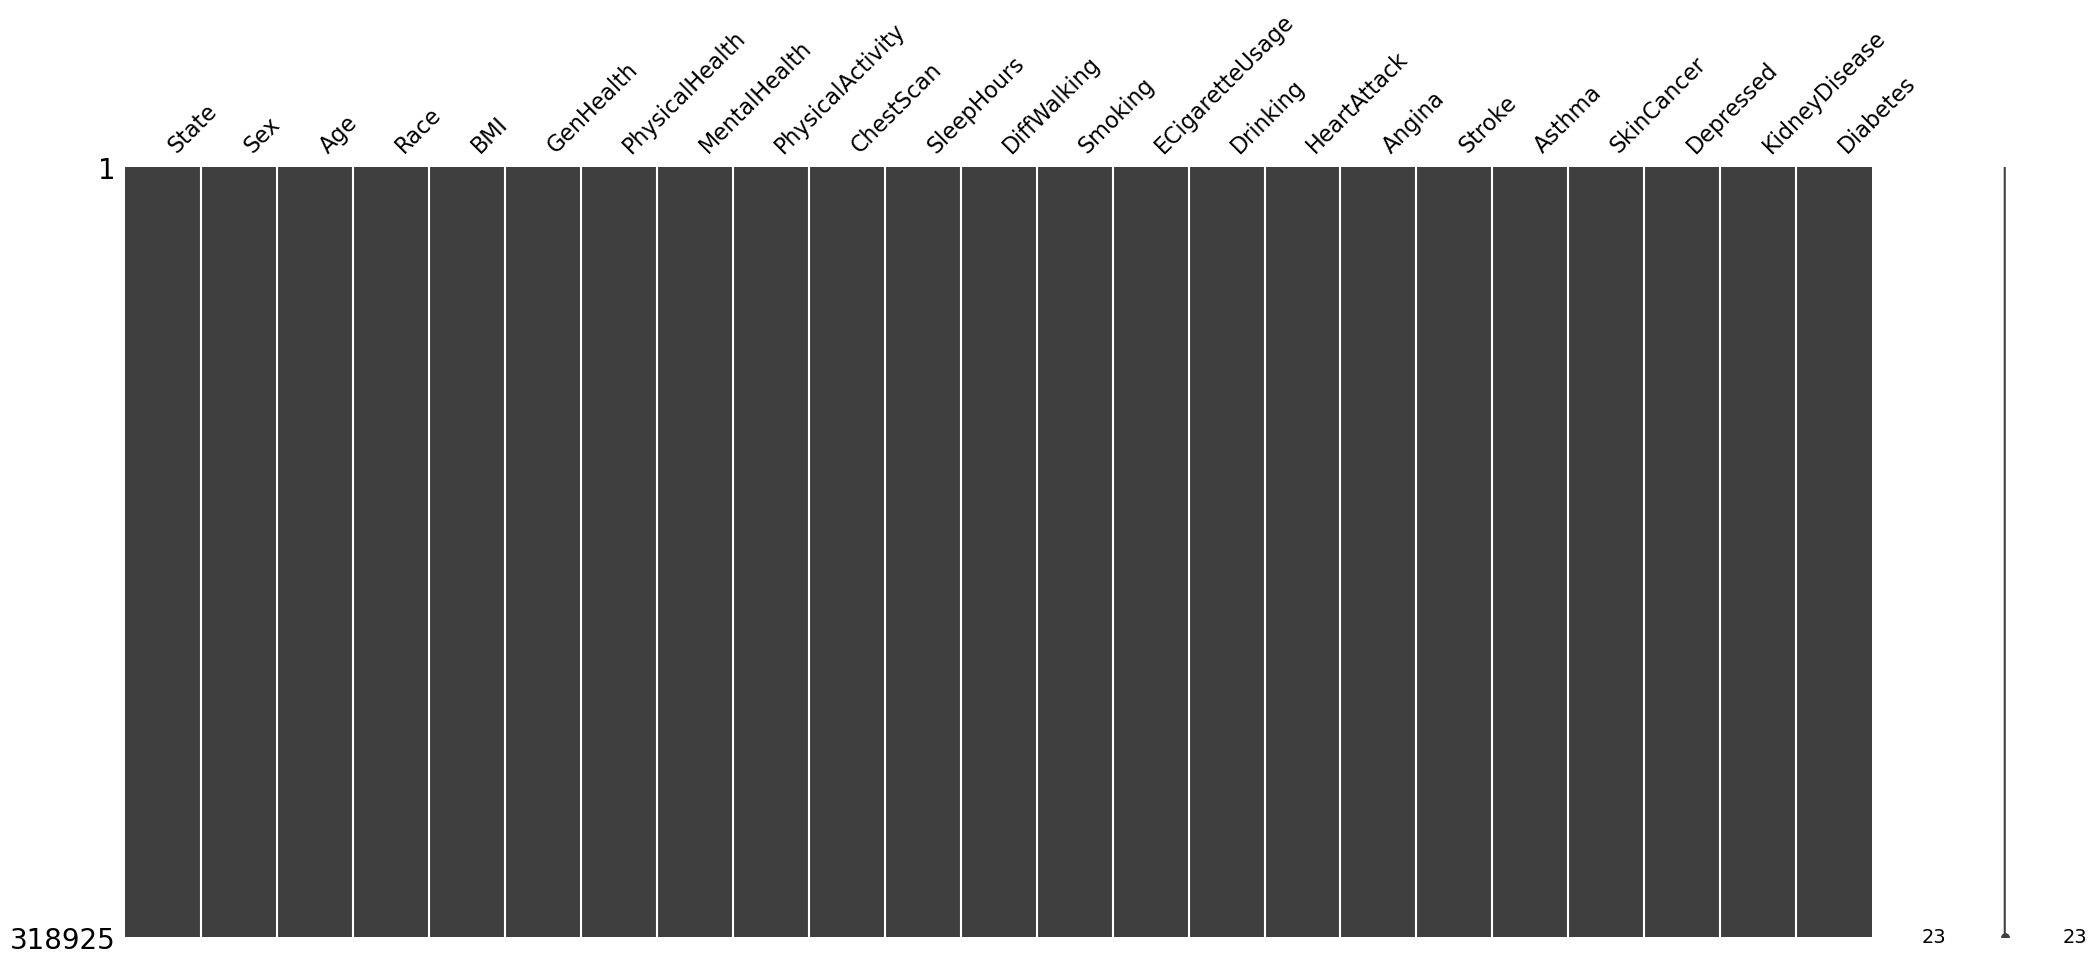

In [15]:
# Check he missing data
msno.matrix(df1)

In [16]:

# Statistical Analysis for numerical data in dataset
df1.describe()

,BMI,PhysicalHealth,MentalHealth,SleepHours
count,318925.000000,318925.000000,318925.000000,318925.000000
mean,28.569902,4.147646,4.317178,7.022109
std,6.515587,8.433619,8.227483,1.443658
min,12.020000,0.000000,0.000000,1.000000
25%,24.190000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.750000,3.000000,5.000000,8.000000
max,97.650000,30.000000,30.000000,24.000000


In [17]:
df1.dtypes

State                object
Sex                  object
Age                  object
Race                 object
BMI                 float64
GenHealth            object
PhysicalHealth      float64
MentalHealth        float64
PhysicalActivity     object
ChestScan            object
SleepHours          float64
DiffWalking          object
Smoking              object
ECigaretteUsage      object
Drinking             object
HeartAttack          object
Angina               object
Stroke               object
Asthma               object
SkinCancer           object
Depressed            object
KidneyDisease        object
Diabetes             object
dtype: object

In [18]:
df1.describe(include="object")

,State,Sex,Age,Race,GenHealth,PhysicalActivity,ChestScan,DiffWalking,Smoking,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
count,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925,318925
unique,54,2,13,5,5,2,2,2,4,4,2,2,2,2,2,2,2,2,4
top,Washington,Female,Age 65 to 69,"White only, Non-Hispanic",Very good,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,No,No,No,No,No,No,No,No
freq,19036,163410,34885,241132,112204,247712,185307,272507,192467,243692,176142,301979,300008,306075,271260,292637,252214,304756,266735


In [19]:
# Print out all description by columns
# Use FOR loop to iterate over columns

for col in df1.describe(include="object").columns:
    print(f"Column Name: {col} with {len(df1[col].unique())} distinct values")
    print(df1[col].unique())
    print("____________________________________")

Column Name: State with 54 distinct values
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
____________________________________
Column Name: Sex with 2 distinct values
['Female' 'Male']
____________________________________
Column Name: Age with 13 distinct values
['Age 80 or older' 'Age 55 to 59' 'Age 40 to 44' 'Age 65 to 69'
 'Age 70 to 74' 'Age 60 to 64' 'Age 75 to 79' 'Age 50 to 54'
 'Age 45 to 49'

In [20]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## Since, some categorical attributes are overlapping --> Cleaning Needed

In [21]:
# Check the "Race" category
unique_race = df1["Race"].value_counts()
print(unique_race)

Race
White only, Non-Hispanic         241132
Hispanic                          29942
Black only, Non-Hispanic          24334
Other race only, Non-Hispanic     16251
Multiracial, Non-Hispanic          7266
Name: count, dtype: int64


In [22]:
# Define re-names
rename_race = {
    "White only, Non-Hispanic": "White",
    "Black only, Non-Hispanic" : "Black",
    "Other race only, Non-Hispanic": "Other",
    "Multiracial, Non-Hispanic": "Multiracial"
}

# Replace values in the "Race" column
df1["Race"] = df1["Race"].replace(rename_race)
print(df1["Race"].value_counts())

Race
White          241132
Hispanic        29942
Black           24334
Other           16251
Multiracial      7266
Name: count, dtype: int64


In [23]:
# Check the "Age" category
print(df1["Age"].value_counts())

Age
Age 65 to 69       34885
Age 60 to 64       32885
Age 70 to 74       31746
Age 55 to 59       27413
Age 50 to 54       25025
Age 80 or older    23448
Age 75 to 79       23051
Age 40 to 44       22339
Age 45 to 49       21293
Age 35 to 39       21157
Age 18 to 24       20312
Age 30 to 34       18892
Age 25 to 29       16479
Name: count, dtype: int64


In [24]:
df1["Age"] = (df1["Age"]
                     .str.replace(" to ", "-")
                     .str.replace("Age ", ""))

print(df1["Age"].value_counts())

Age
65-69          34885
60-64          32885
70-74          31746
55-59          27413
50-54          25025
80 or older    23448
75-79          23051
40-44          22339
45-49          21293
35-39          21157
18-24          20312
30-34          18892
25-29          16479
Name: count, dtype: int64


In [25]:
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                                         266735
Yes                                         42432
No, pre-diabetes or borderline diabetes      7109
Yes, but only during pregnancy (female)      2649
Name: count, dtype: int64


In [26]:
rename_diabetes = {
    "No, pre-diabetes or borderline diabetes": "No, borderline diabetes",
    "Yes, but only during pregnancy (female)": "Yes, during pregnancy"
}
df1["Diabetes"] = df1["Diabetes"].replace(rename_diabetes)

# Check again
# Check unique values of Diabetes
print(df1["Diabetes"].value_counts())

Diabetes
No                         266735
Yes                         42432
No, borderline diabetes      7109
Yes, during pregnancy        2649
Name: count, dtype: int64


# 3. Exploratory Data Analysis (EDA)

In [27]:
# Find numeric columns
num_cols= df1.select_dtypes(include=["number"]).columns.tolist()
num_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepHours']

In [28]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

## 3.1. One-Variable Analysis

### 3.1.1. Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


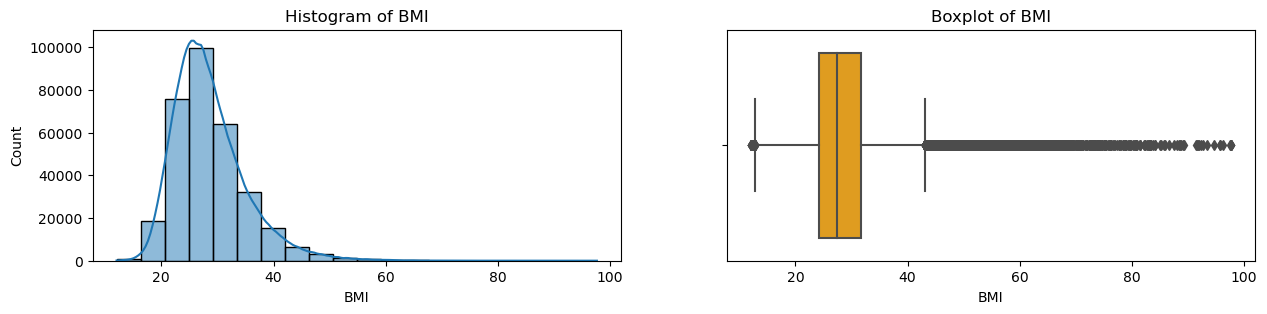

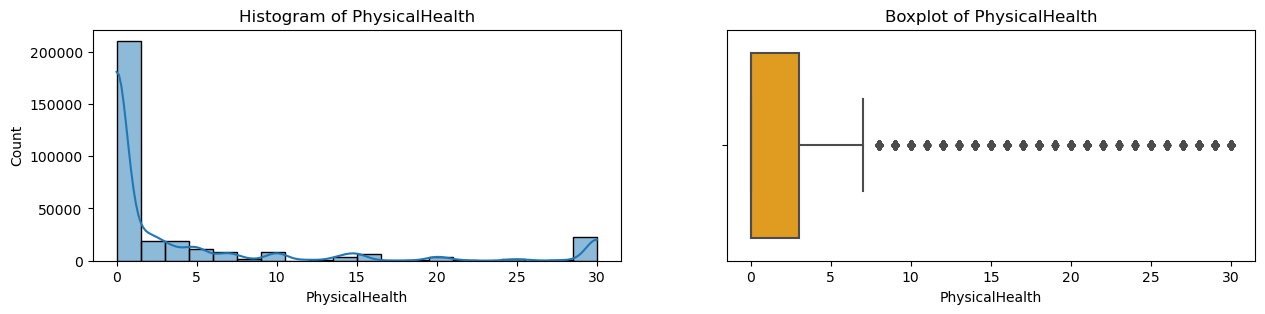

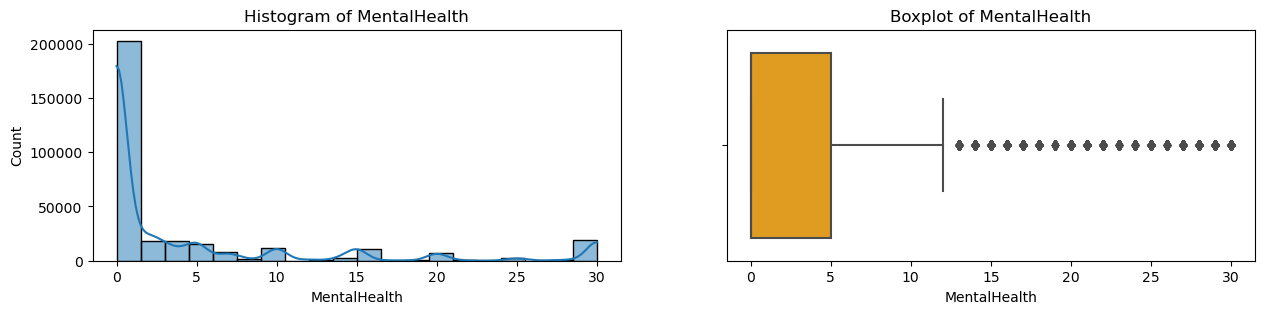

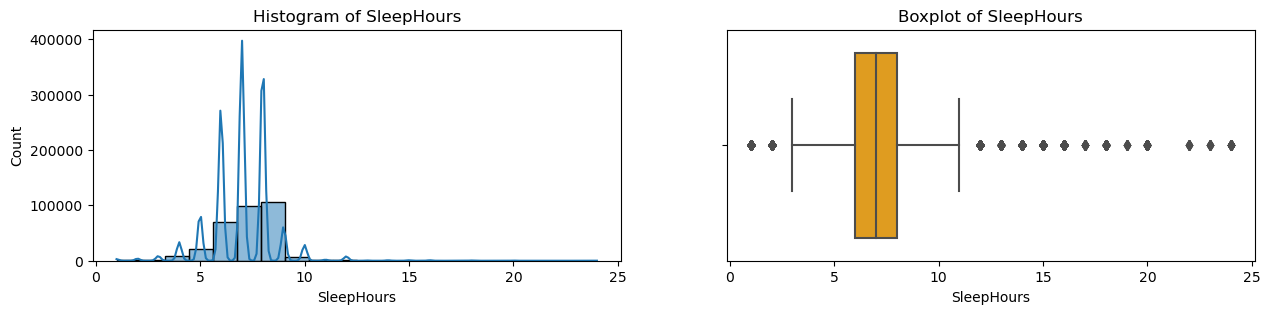

In [29]:
# Define Analysis function of numerical columns
def analysis_num(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    
    sns.histplot(df1[col], kde=True, bins=20, ax=ax[0])
    ax[0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df1[col], color="orange", ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}")

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num(col)

#### How many outliers?

In [30]:
# Define a function to count number of outlier data
def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    return ((data < lower_bound) | (data > upper_bound)).sum()

# Call count outlier function for each numerical fearture
for col in num_cols:
    print(f"Number of outliers in {col}: {count_outliers(df1[col])}")

Number of outliers in BMI: 9928
Number of outliers in PhysicalHealth: 50567
Number of outliers in MentalHealth: 43123
Number of outliers in SleepHours: 4534


### 3.1.2. Categorical Features

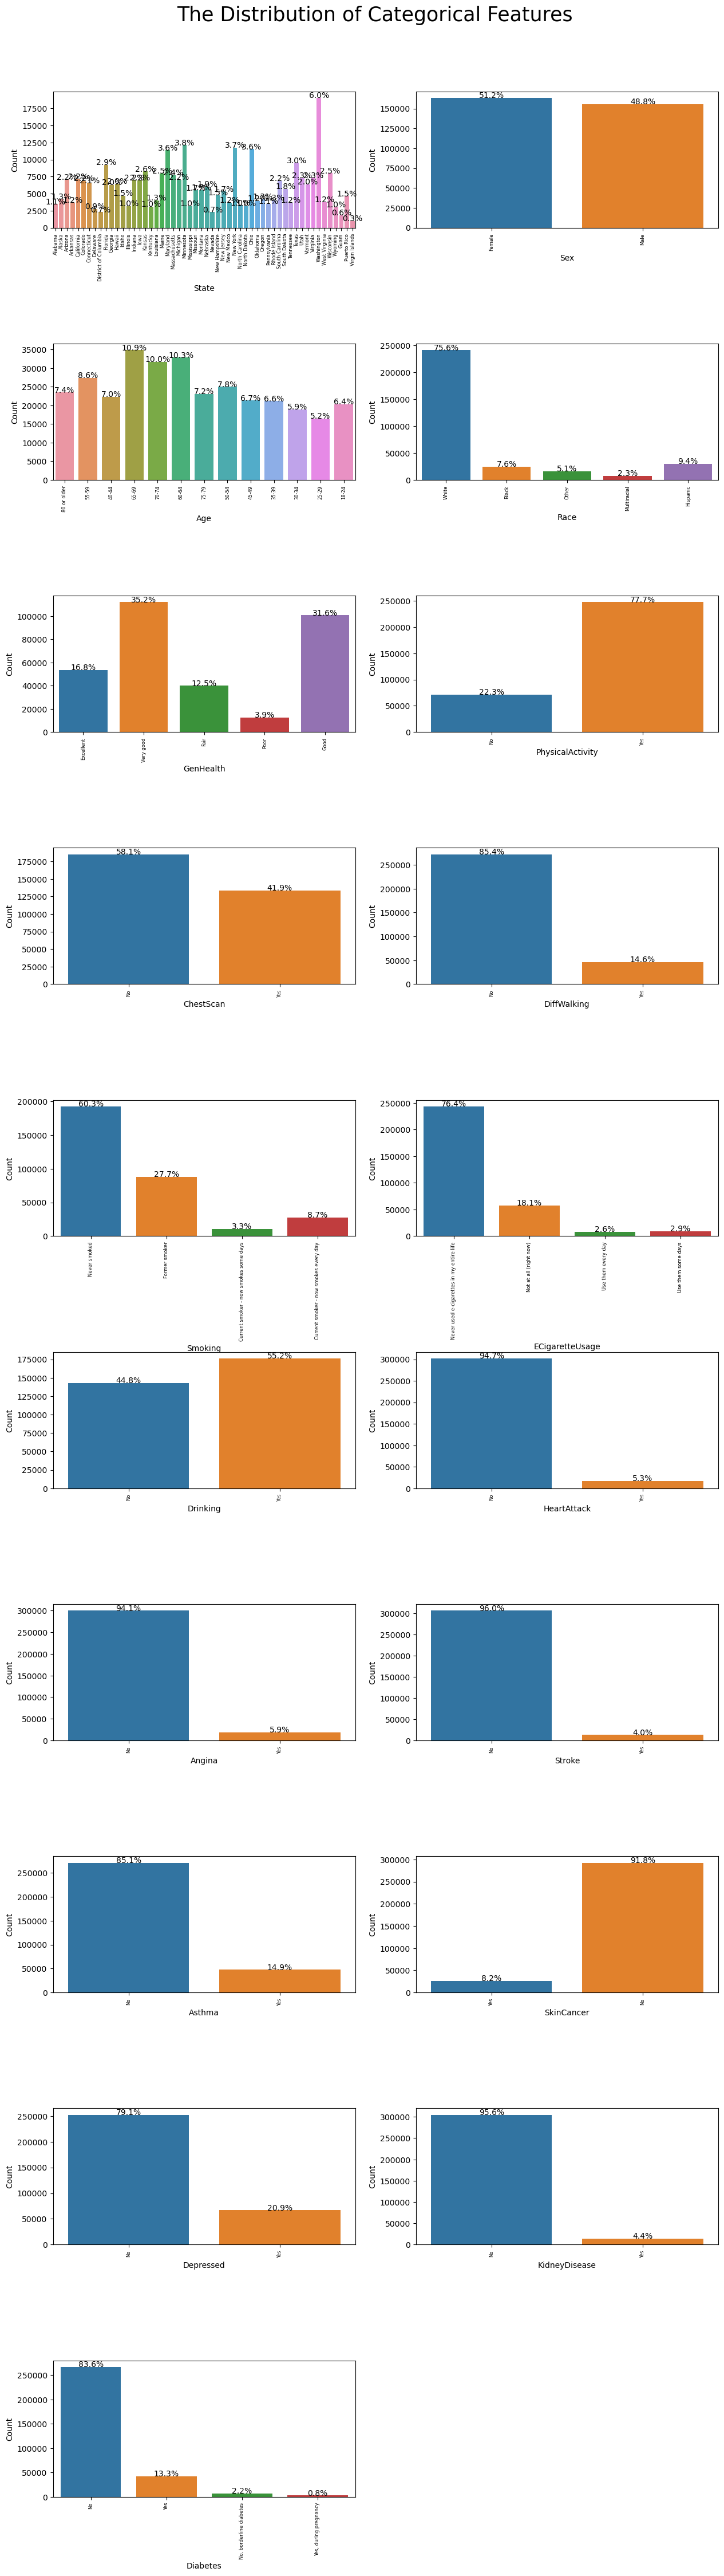

In [31]:
# Determin the number of rows and columns
L = len(cat_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(cat_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")
# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('The Distribution of Categorical Features', fontsize=25)
plt.show()

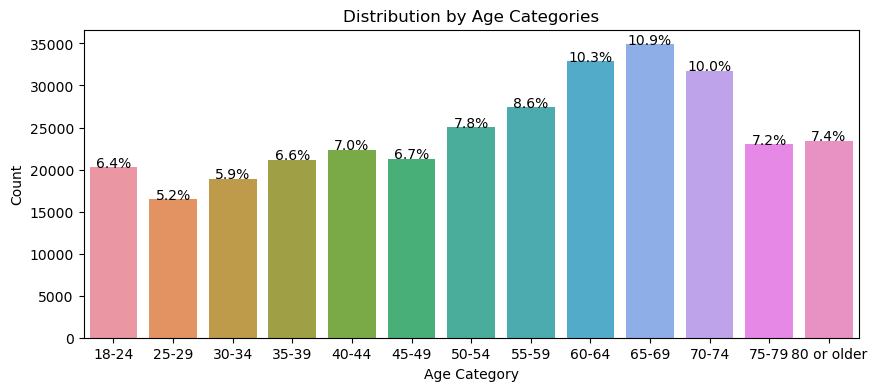

In [32]:
# Set figure styles
plt.figure(figsize=(10,4))

#Plot countplot
ax = sns.countplot(
    data=df1, 
    x="Age", 
    order = sorted(df1["Age"].unique())
    )

# Customize plot
ax.set(
    xlabel = "Age Category",
    ylabel = "Count",
    title = "Distribution by Age Categories"
)

# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Overall Distribution of Heart Attack

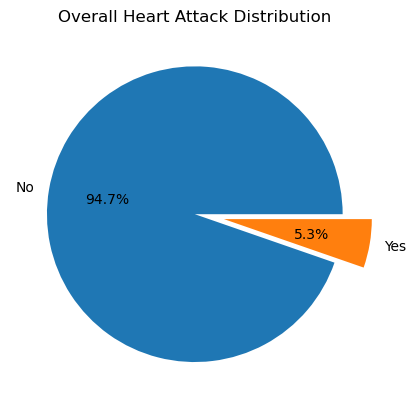

In [33]:
# Heart Attack distribution
heart_attack_rate = df1["HeartAttack"].value_counts()
plt.pie(
    heart_attack_rate.values, 
    labels = heart_attack_rate.index,
    autopct = "%.1f%%", 
    explode = [0, 0.2]
    )
plt.title("Overall Heart Attack Distribution")
plt.show()

## 3.2. Two-Variables Analysis

### 3.2.1 Analysis by Numerical Features

Analysis for BMI columns:
Analysis for PhysicalHealth columns:
Analysis for MentalHealth columns:
Analysis for SleepHours columns:


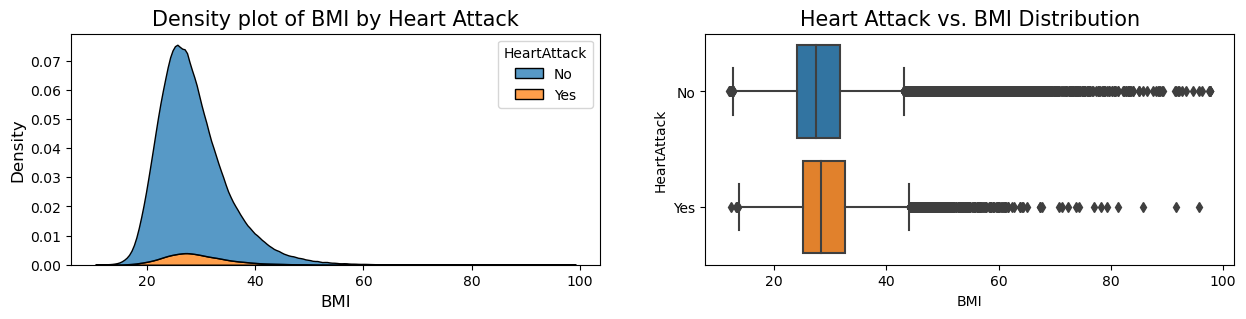

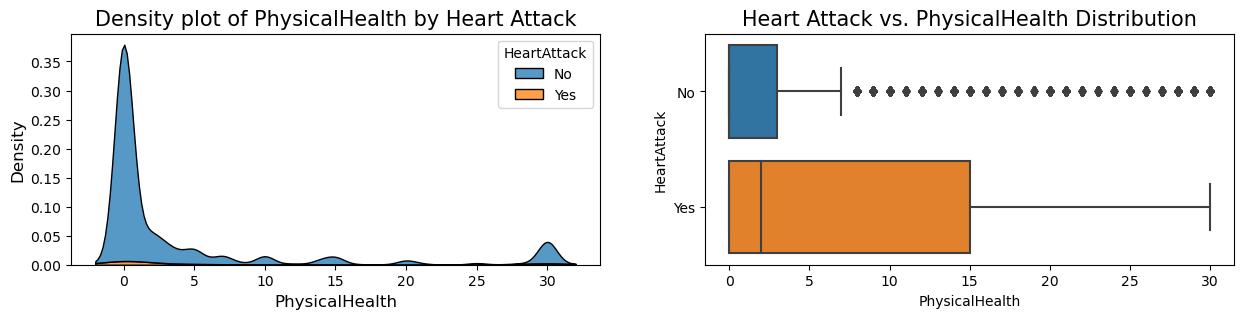

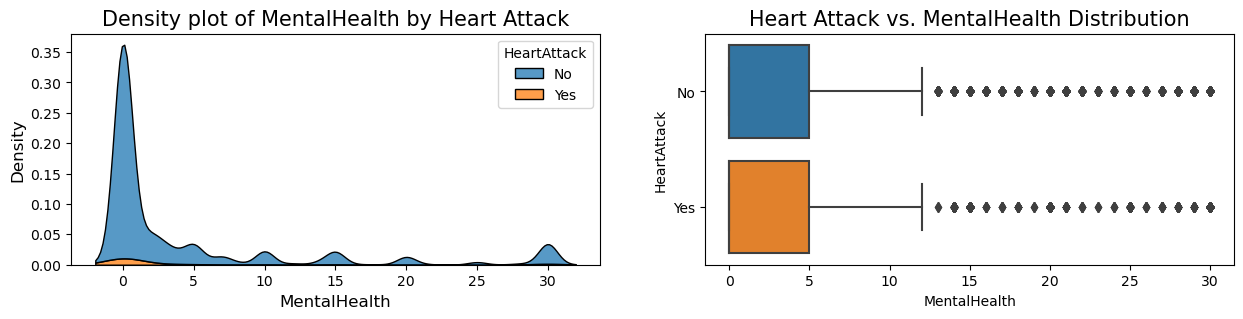

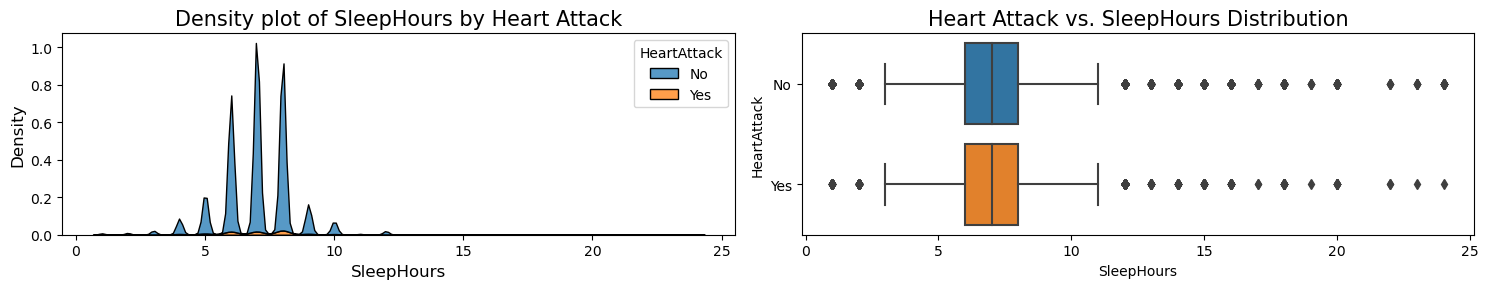

In [34]:
# Define Analysis function of numerical columns
def analysis_num_2(col):
    fig, ax = plt.subplots(1,2, figsize = (15,3))
    
    # KDE Plot
    sns.kdeplot(data=df1, x=col, hue="HeartAttack", multiple="stack", ax=ax[0])
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    ax[0].set_title(f"Density plot of {col} by Heart Attack", fontsize=15)

    # Boxplot
    sns.boxplot(data=df1, x=col, y="HeartAttack", ax=ax[1])
    ax[1].set_title(f"Heart Attack vs. {col} Distribution", fontsize=15)

# FOR LOOPs for each column in numerical columns
for col in num_cols:
    print(f"Analysis for {col} columns:")
    analysis_num_2(col)
    
plt.tight_layout()
plt.show()

### 3.2.2 Analysis by Categorical Features

### Heart Attack Among Genders

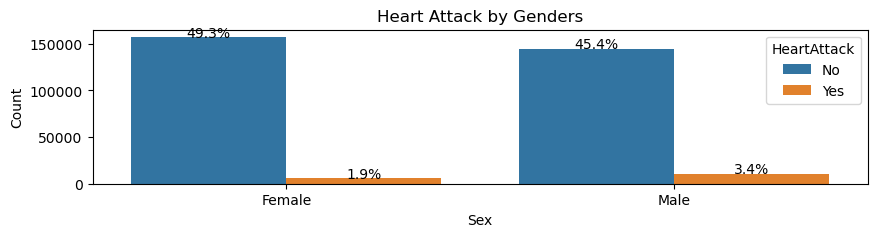

In [35]:
# Set figure styles
plt.figure(figsize=(10,2))

#Plot countplot
ax = sns.countplot(data=df1, x="Sex", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Genders"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by States

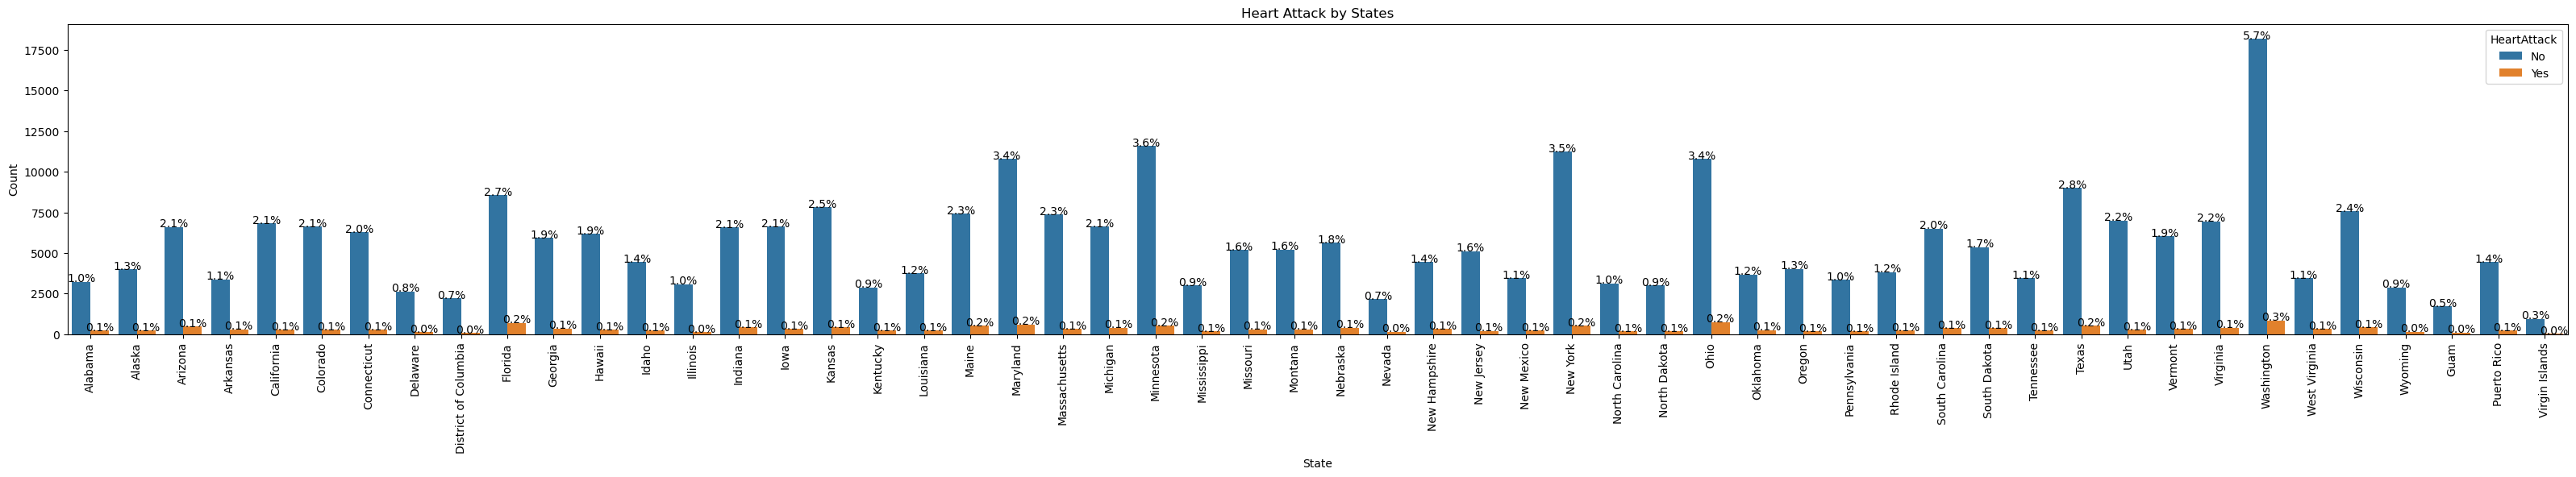

In [36]:
# Set figure styles
plt.figure(figsize=(40,5))

#Plot countplot
ax = sns.countplot(data=df1, x="State", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by States"
)
ax.tick_params(axis='x', rotation=90, labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

#### Heart Attack by Age Groups

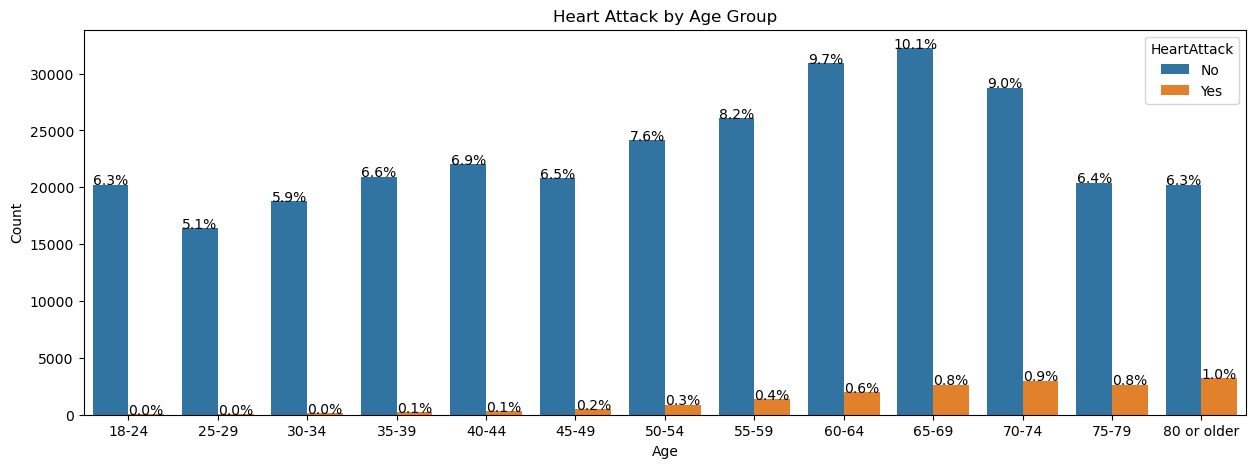

In [37]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Age", hue="HeartAttack", order = sorted(df1["Age"].unique()))

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Age Group"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Race

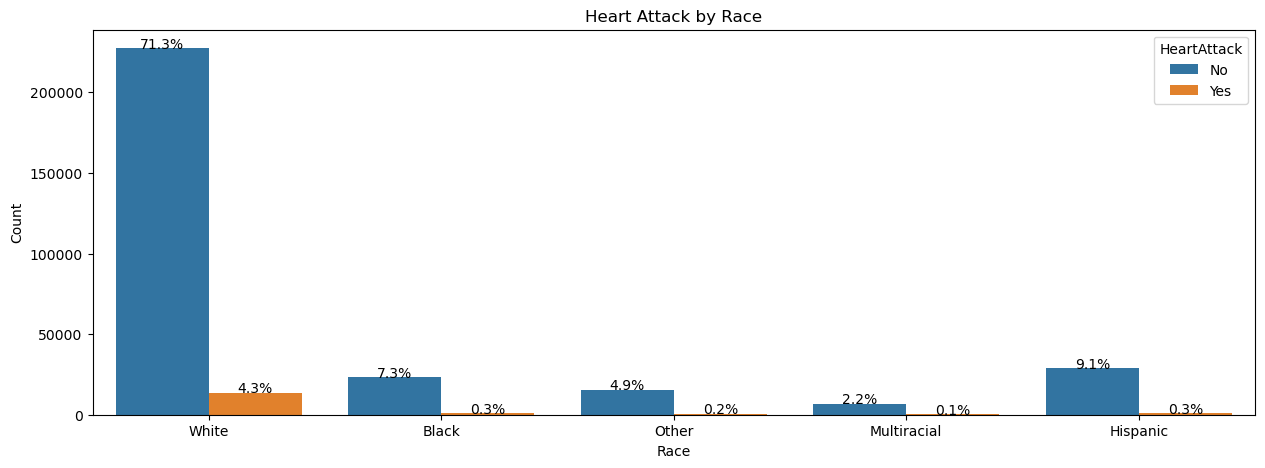

In [38]:
# Set figure styles
plt.figure(figsize=(15,5))

#Plot countplot
ax = sns.countplot(data=df1, x="Race", hue="HeartAttack")

# Customize plot
ax.set(
    ylabel = "Count",
    title = "Heart Attack by Race"
)
ax.tick_params(axis='x', labelsize=10)
# Add labels to bars
total = float(len(df1))
for percent in ax.patches:
    height = percent.get_height()
    ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Display the plot
plt.show()

### Heart Attack by Other Categorical Features

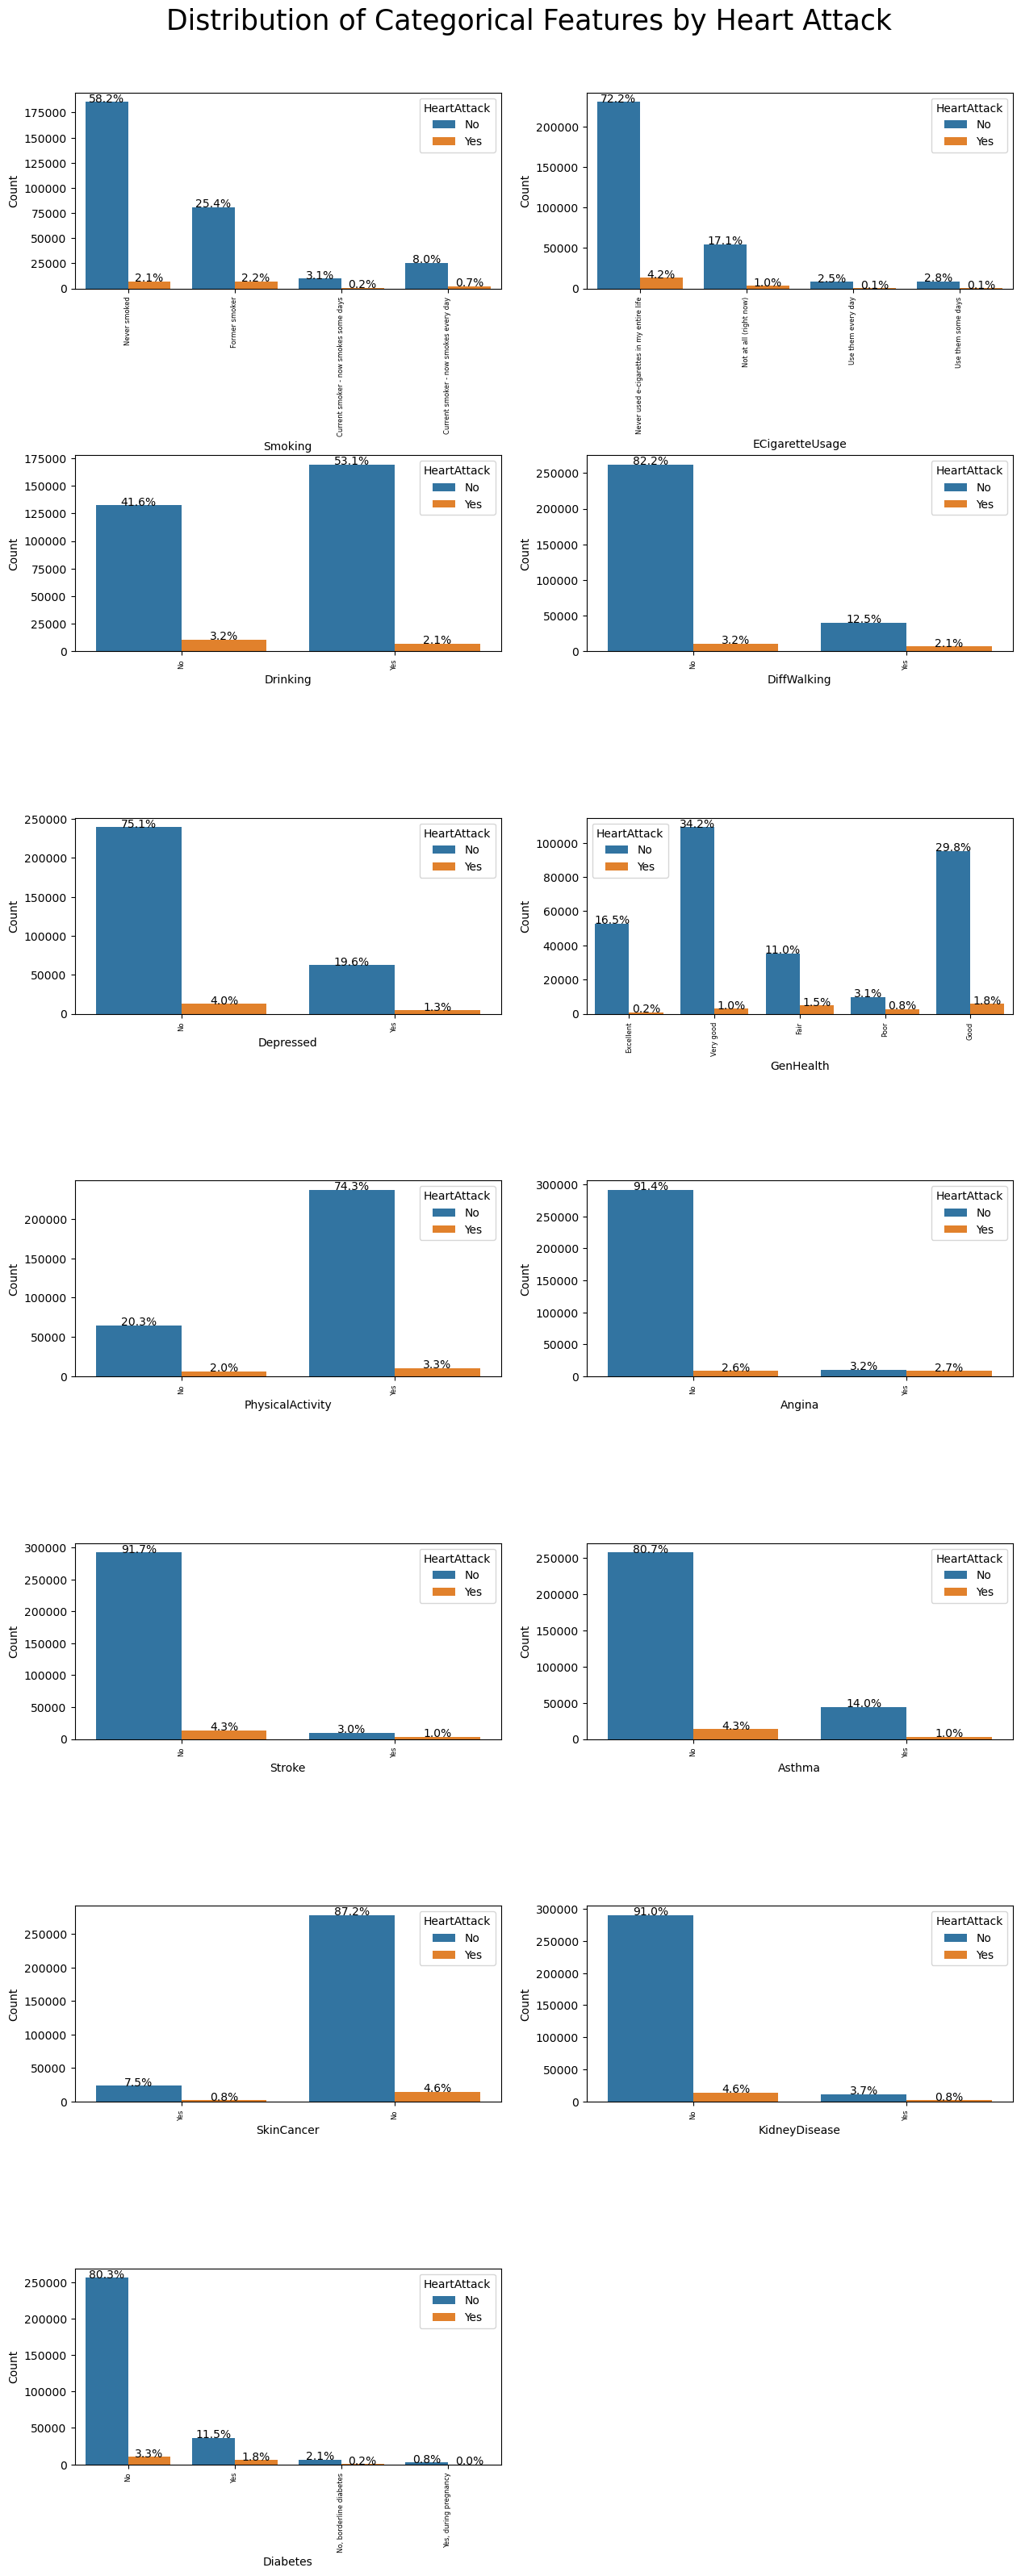

In [39]:
risk_cols = ['Smoking', 'ECigaretteUsage', 'Drinking', 'DiffWalking', 'Depressed', 
             'GenHealth', 'PhysicalActivity', 'Angina', 'Stroke', 'Asthma', 
             'SkinCancer', 'KidneyDisease', 'Diabetes'] 
# Determin the number of rows and columns
L = len(risk_cols)
ncol = 2
nrow = int(np.ceil(L / ncol)) # Calculates the number of rows needed to fit all categorical columns

# Create Subplots
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 5 * nrow))
# Adjust the spacing of the subplots
fig.subplots_adjust(top=0.95, hspace=0.85, wspace=0.2)

for i, col in enumerate(risk_cols):
    ax = axs[i // ncol, i % ncol] # determines the row & determines the column, respectively
    sns.countplot(data=df1, x=col, hue="HeartAttack", ax=ax)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=90, labelsize=6)

    # Add labels to bars
    total = float(len(df1))
    for percent in ax.patches:
        height = percent.get_height()
        ax.text(percent.get_x() + percent.get_width() / 2, height, '{:.1f}%'.format((height/total)*100), ha="center")

# Hide the last subplot if the number of columns is odd    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Attack', fontsize=25)
plt.show()

# 4. Data Processing

### 4.1. Convert Categorical Variables to Numerical Variables

In [40]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique() 
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease']

In [41]:
# Copy df1 to df2
df2 = df1.copy()

# Then, drop column named "State"
df2 = df2.drop("State", axis=1)

In [42]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df2[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df2[col] = df2[col].map(mapping)
    
    # Verify conversion
    if set(df2[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df2[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  object 
 2   Race              318925 non-null  object 
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  object 
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  object 
 12  ECigaretteUsage   318925 non-null  object 
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

In [44]:
# Encoding "object" type variables

# Age 
age_mapping = {
    '18-24': 0, 
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df2["Age"] = df2["Age"].replace(age_mapping).astype(int)

# Race
race_mapping = {
    'White': 0, 
    'Black': 1,
    'Other': 2, 
    'Multiracial': 3, 
    'Hispanic': 4
}
df2["Race"] = df2["Race"].replace(race_mapping).astype(int)

# GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df2["GenHealth"] = df2["GenHealth"].replace(genhealth_mapping).astype(int)

# Smoking
smoking_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df2["Smoking"] = df2["Smoking"].replace(smoking_mapping).astype(int)

# ECigaretteUsage
ec_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them every day': 2,
    'Use them some days': 3
}
df2["ECigaretteUsage"] = df2["ECigaretteUsage"].replace(ec_mapping).astype(int)

# Diabetic 
diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 3,
    'Yes, during pregnancy': 4
}
df2["Diabetes"] = df2["Diabetes"].replace(diabetic_mapping).astype(int)

In [45]:
# Check columns' type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  int64  
 2   Race              318925 non-null  int64  
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  int64  
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  int64  
 12  ECigaretteUsage   318925 non-null  int64  
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

### 4.2. Correlation Matrix

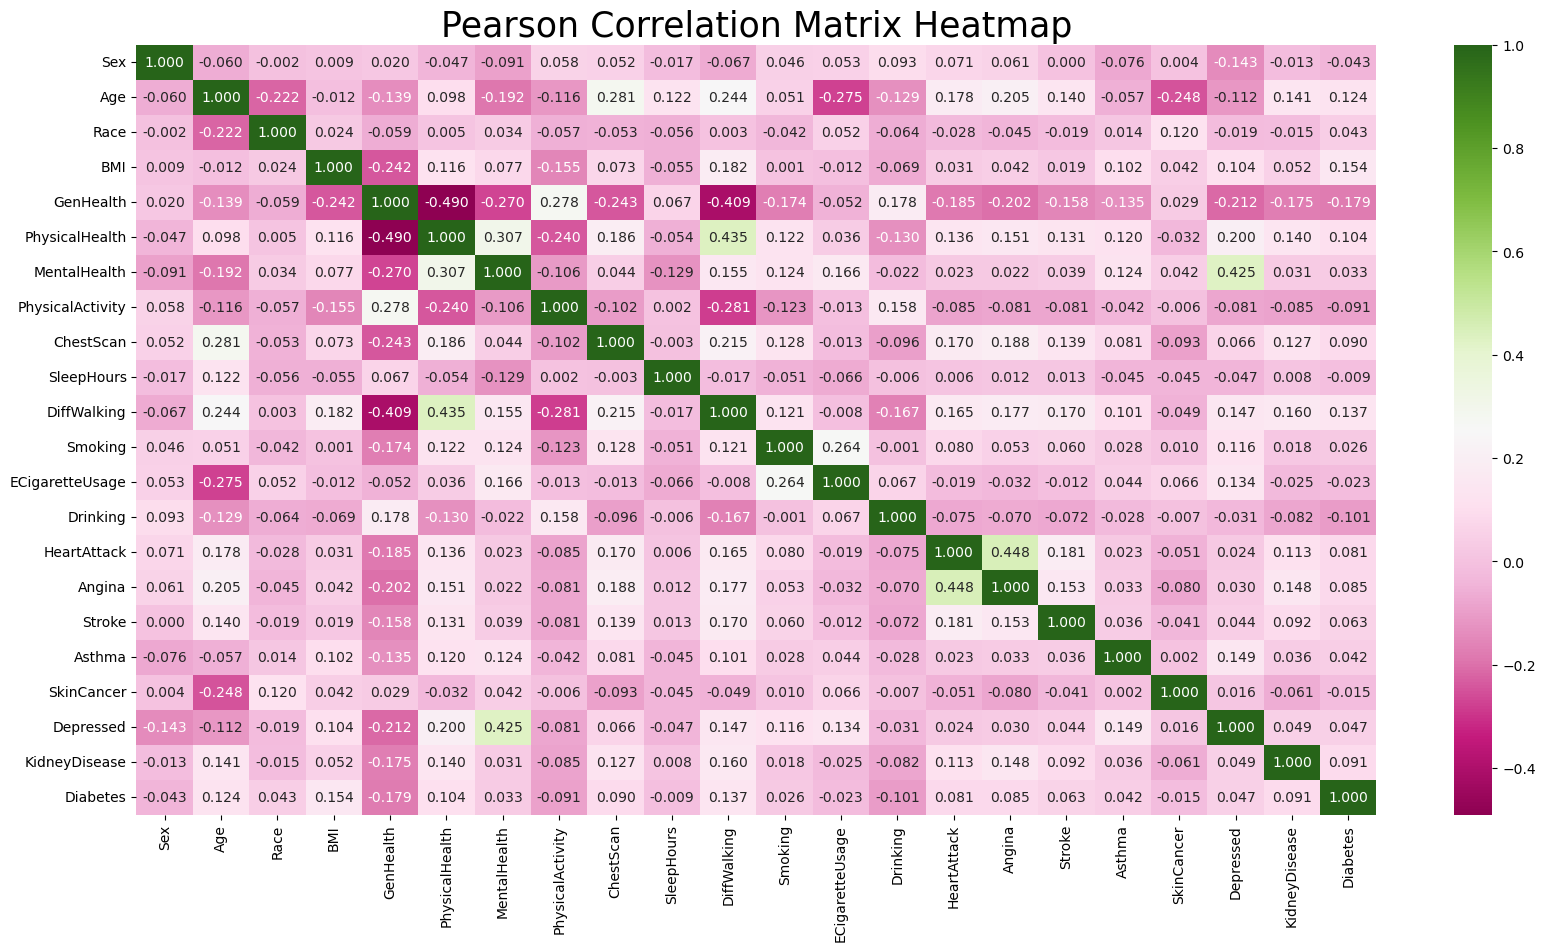

In [46]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [47]:
# Copy dataset for Machine Learning
df3 = df2.copy()

In [48]:
df3

,Sex,Age,Race,BMI,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,...,ECigaretteUsage,Drinking,HeartAttack,Angina,Stroke,Asthma,SkinCancer,Depressed,KidneyDisease,Diabetes
1,0,12,0,26.57,4,0.0,0.0,0,0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,0,25.61,3,2.0,3.0,1,0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,21.77,1,2.0,0.0,1,1,9.0,...,0,1,0,0,0,0,1,0,0,0
5,1,12,0,26.08,0,1.0,0.0,0,0,7.0,...,0,0,1,0,1,0,1,0,0,1
6,0,12,1,22.96,3,0.0,0.0,1,0,7.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445124,1,9,3,29.86,2,0.0,15.0,1,0,7.0,...,0,1,0,0,1,0,1,0,0,1
445126,1,2,0,31.19,2,0.0,0.0,1,0,8.0,...,0,1,0,0,0,0,1,0,0,0
445128,0,6,1,28.66,4,2.0,2.0,1,0,7.0,...,0,0,0,0,0,0,1,0,0,0
445130,1,10,1,32.55,3,0.0,0.0,0,1,5.0,...,0,0,1,0,0,1,1,0,0,0


In [49]:
# Split the data into feature (X) and target variable (y)
X = df3.drop("HeartAttack", axis=1)
y = df3["HeartAttack"]

In [50]:
# Dealing with Imbalanced Data
# Assuming X is feature DataFrame and y is target variable
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling
smote = SMOTE(random_state=78)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# X_resampled and y_resampled are now new balanced datasets

In [51]:
# Split the data using train_test_split # stratify=y
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=78)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [52]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=78)

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=78)

In [53]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

,y_test,prediction
98883,0,0
368616,1,1
509717,1,1
585369,1,1
263021,0,0
157998,0,0
257055,0,0
456957,1,1
446283,1,1
554800,1,1


##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [54]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[62469 12905]
 [16358 59258]]


In [55]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.79      0.83      0.81     75374
     Yes (1)       0.82      0.78      0.80     75616

    accuracy                           0.81    150990
   macro avg       0.81      0.81      0.81    150990
weighted avg       0.81      0.81      0.81    150990



**Question:** How well does the logistic regression model predict both the `0` (No Heart Attack) and `1` (Had Heart Attack) labels?

**Answer:** 

### 5.2. Deep Learning - Standard Scaler Module

In [56]:
# Copy dataset for Machine Learning
df4 = df2.copy()

In [57]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df4.nunique())

Sex                    2
Age                   13
Race                   5
BMI                 3748
GenHealth              5
PhysicalHealth        31
MentalHealth          31
PhysicalActivity       2
ChestScan              2
SleepHours            23
DiffWalking            2
Smoking                4
ECigaretteUsage        4
Drinking               2
HeartAttack            2
Angina                 2
Stroke                 2
Asthma                 2
SkinCancer             2
Depressed              2
KidneyDisease          2
Diabetes               4
dtype: int64


In [58]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df4["BMI"].value_counts()
bmi_counts

BMI
26.63    3438
27.46    2642
24.41    2601
27.44    2494
27.12    2468
         ... 
60.15       1
59.13       1
20.17       1
47.28       1
28.39       1
Name: count, Length: 3748, dtype: int64

In [60]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 150].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df4['BMI'] = df4['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df4['BMI'].value_counts()

BMI
Other    72173
26.63     3438
27.46     2642
24.41     2601
27.44     2494
         ...  
25.29      152
26.94      151
26.46      150
20.48      150
26.17      150
Name: count, Length: 451, dtype: int64

In [61]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df4 = pd.get_dummies(df4)
num_df4.head()

,Sex,Age,Race,GenHealth,PhysicalHealth,MentalHealth,PhysicalActivity,ChestScan,SleepHours,DiffWalking,...,BMI_42.07,BMI_42.51,BMI_42.57,BMI_42.91,BMI_43.05,BMI_43.27,BMI_44.29,BMI_44.3,BMI_44.63,BMI_Other
1,0,12,0,4,0.0,0.0,0,0,6.0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,7,0,3,2.0,3.0,1,0,5.0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,4,0,1,2.0,0.0,1,1,9.0,0,...,False,False,False,False,False,False,False,False,False,False
5,1,12,0,0,1.0,0.0,0,0,7.0,0,...,False,False,False,False,False,False,False,False,False,True
6,0,12,1,3,0.0,0.0,1,0,7.0,0,...,False,False,False,False,False,False,False,False,False,False


In [62]:
X = num_df4.drop("HeartAttack", axis=1).values
y = num_df4["HeartAttack"].values

In [63]:
# Dealing with Imbalanced Data
# Assuming X is feature DataFrame and y is target variable
X_scaled = MinMaxScaler().fit_transform(X)

# SMOTE for Resampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# X_resampled and y_resampled are now new balanced datasets

In [64]:
# Split the data using train_test_split # stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, 
    y_resampled, 
    stratify = y_resampled,  # to maintain the same proportion of classes in both train and test sets. 
    random_state = 78
)

In [65]:
# Preprocess numerical data for Neural Network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler and Scale the data
#X_scaler = scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [66]:

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        37,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,801 (198.44 KB)

 Trainable params: 50,801 (198.44 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

In [69]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4719/4719 - 1s - 270us/step - accuracy: 0.9364 - loss: 0.1759
Loss: 0.17594686150550842, Accuracy: 0.936393141746521


In [ ]:
# Compute the TensorFlow Confusion Matrix
# Predict on the test set
y_pred = nn_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int).flatten() # a threshold of 0.5 to convert probabilities to binary class labels.

# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

print('Confusion Matrix:')
print(confusion_matrix.numpy())